In [1]:
#!pip install statsmodels

In [2]:
import pandas as pd

data =  {
    'x' : [1,2,3,4,5],
    'y' : [1,3,4,6,5]
}

df = pd.DataFrame(data)
df

,x,y
0,1,1
1,2,3
2,3,4
3,4,6
4,5,5


In [4]:
# 선형회귀분석
import statsmodels.formula.api as smf

#                formula = 'y값 ~ x값' , data = 데이터프레임
lm_model = smf.ols(formula='y ~ x', data = df).fit()

In [5]:
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

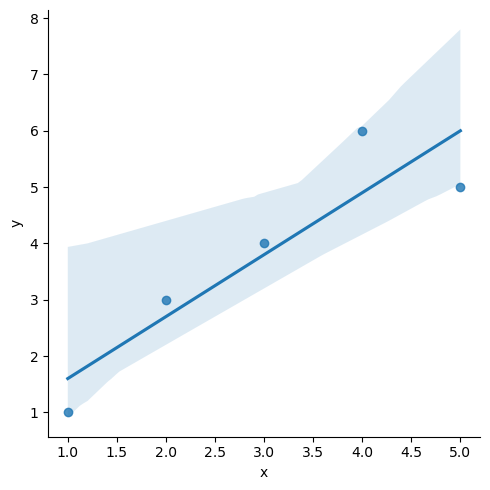

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x = 'x', y = 'y', data = df)

잔차 평가

In [7]:
resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

In [11]:
df['y'] - lm_model.predict()

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
Name: y, dtype: float64

결정계수

$R^2$ = $\sum(\hat{y} - \mu)^2\over \sum(y - \mu)^2$

실제값들이 가지는 평균으로부터 예측값들의 차이 제곱합과 평균으로부터 실제값의 차이 제곱합으로

예측값과 실제값이 일치하면 결정계수는 1이 된다.

즉 결정계수가 높을수록 좋은 모델이라 할 수 있다.

In [8]:
import numpy as np

mu = np.mean(df['y'])
y = df['y'] # 실제값

y_hat = lm_model.predict() #예측값

np.sum((y_hat - mu)**2) / np.sum((y - mu)**2) # 직접 계산할 수도 있고

0.8175675675675671

In [9]:
lm_model.rsquared # 간편하게 구할 수도 있다.

0.8175675675675677

## 통계적 회귀

회귀에서 중요하게 생각하는 지표 몇 개를 살펴보자.

In [13]:
data_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv'
data = pd.read_csv(data_url)
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


이커머스 회사의 고객 정보가 담겨진 데이터이다.

- 'Avg. Session Length' : 한번 접속했을 때 평균 어느정도의 시간을 사용하는지에 대한 데이터
- 'Time on App' : 폰 앱으로 접속했을 때 유지 시간(분)
- 'Time on Website' : 웹사이트로 접속했을 때 유지 시간(분)
- 'Length of Membership' : 회원 자격 유지 기간(연)


In [14]:
# 분석에 필요없는 컬럼 삭제

data.drop(['Email', 'Address', 'Avatar'], axis = 1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


<Axes: >

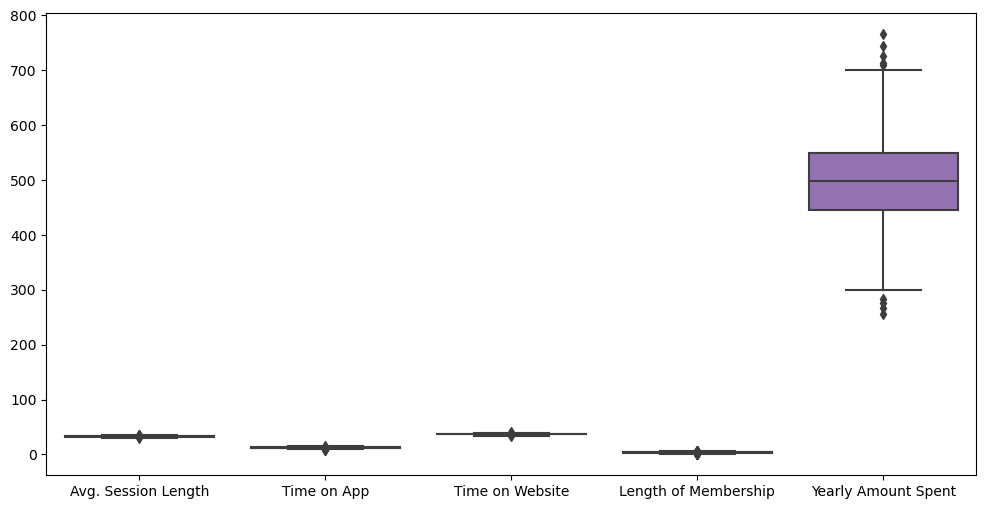

In [15]:
# 컬럼별 boxplot

plt.figure(figsize=(12,6))
sns.boxplot(data = data)

<Axes: >

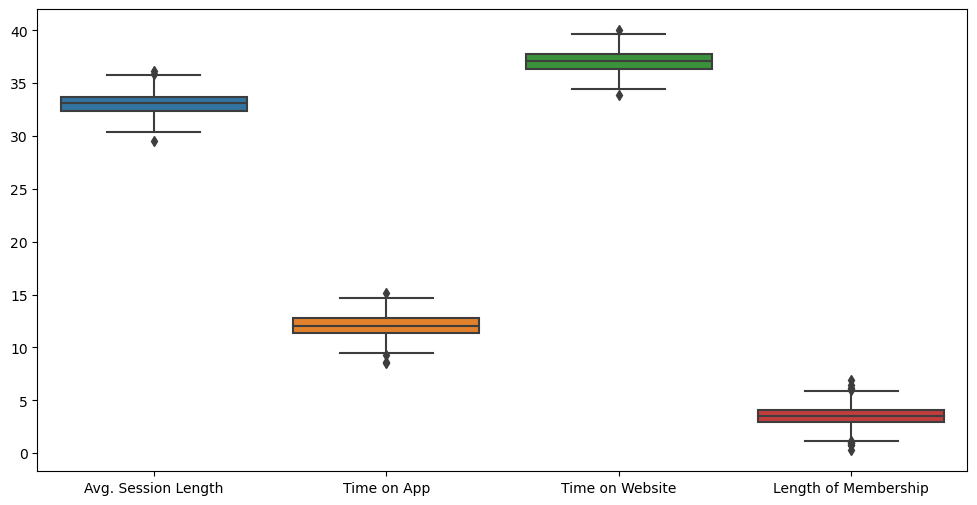

In [16]:
# 'Yearly Amount Spent' 필드의 값이 커서 나머지 boxplot의 분포가 잘 보이지 않으므로
# 나머지 4개 컬럼만 다시 살펴보자.

plt.figure(figsize=(12,6))
sns.boxplot(data = data.iloc[:, :-1])

특별히 분포가 이상해보이는 컬럼은 없어보인다.

<Figure size 1200x600 with 0 Axes>

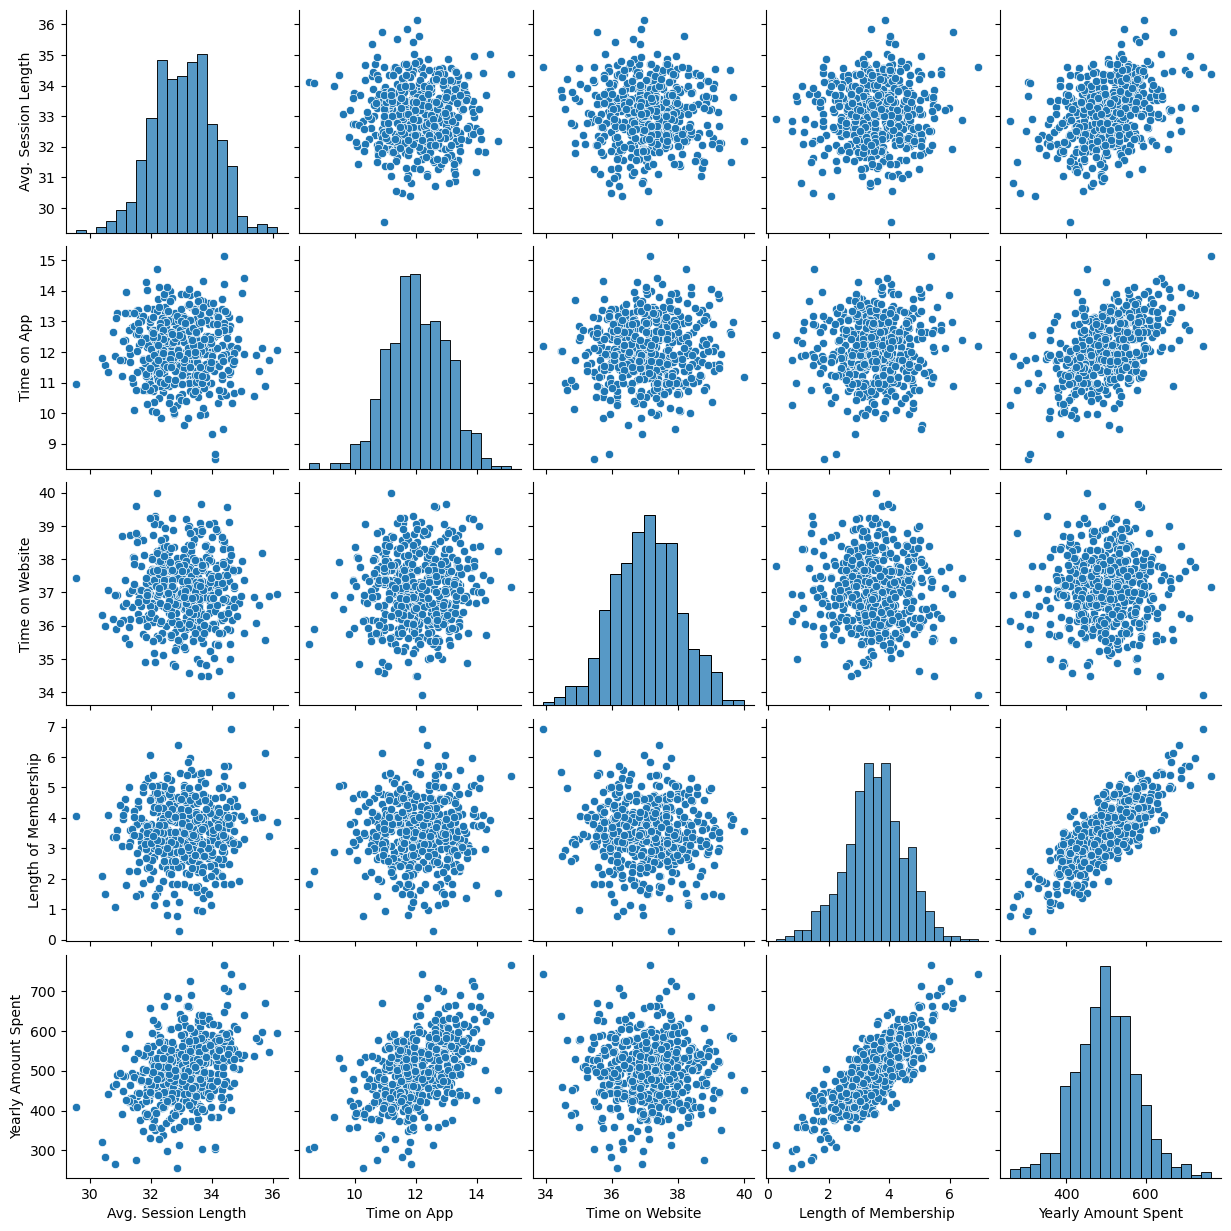

In [17]:
# pairplot 경향 확인

plt.figure(figsize=(12,6))
sns.pairplot(data = data)

'Length of Membership' 컬럼과 'Yearly Amount Spent' 컬럼의 상관성이 보이고 나머지 컬럼들은 특이사항이 없어보인다.

정말로 두 컬럼은 선형성이 있을까?

<Figure size 1200x600 with 0 Axes>

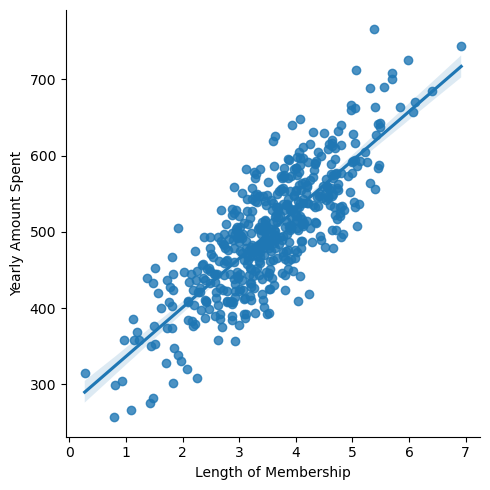

In [18]:
plt.figure(figsize=(12,6))
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = data)

상관계수를 확인해본 것은 아니지만 상관관계에 있는 것 같다!

그럼 두 컬럼만 가지고 회귀시켜보자

In [19]:
import statsmodels.api as sm

X = data['Length of Membership']
y = data['Yearly Amount Spent']
lm = sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.970
Model:                             OLS   Adj. R-squared (uncentered):              0.970
Method:                  Least Squares   F-statistic:                          1.617e+04
Date:                 Wed, 20 Sep 2023   Prob (F-statistic):                        0.00
Time:                         17:17:50   Log-Likelihood:                         -2945.2
No. Observations:                  500   AIC:                                      5892.
Df Residuals:                      499   BIC:                                      5897.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.6117      1.067    127.145      0.000     133.516     137.707
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.472
Skew:                           0.125   Prob(JB):                        0.479
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

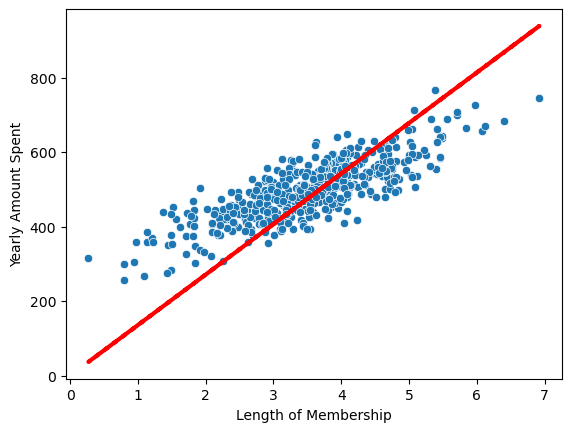

In [22]:
# 회귀 모델 시각화

pred = lm.predict(X)

sns.scatterplot(x = X, y = y)
plt.plot(X, pred, 'r', ls = 'dashed', lw = 3)

상수항을 만들어주지 않았기 때문에 실제값들이 지나가는 직선보다 기울기가 높아져서 잘 안 맞는 것 같다

In [23]:
# 상수항을 넣어주자

X = np.c_[X, [1]*len(X)] # 열추가
X[:5]

array([[4.08262063, 1.        ],
       [2.66403418, 1.        ],
       [4.1045432 , 1.        ],
       [3.12017878, 1.        ],
       [4.44630832, 1.        ]])

In [24]:
lm = sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Wed, 20 Sep 2023   Prob (F-statistic):          4.81e-117
Time:                         17:27:15   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const        272.3998      7.675     35.492      0.000     257.320     287.479
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AIC 는 주어진 데이터셋에 대한 통계 모델의 상대적인 품질을 평가하는 것이다.

AIC를 통해 모델을 선택하는 방법은 "최소의 정보 손실을 갖는 모델이 가장 데이터와 적합한 모델이다"라는 인사이트이다.

AIC 값은 낮을수록 좋은 모델이라고 사용된다.

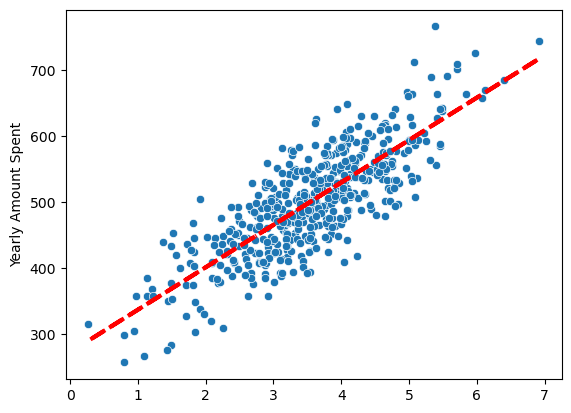

In [27]:
# 회귀 모델 시각화

pred = lm.predict(X)

sns.scatterplot(x = X[:, 0], y = y)
plt.plot(X[:, 0], pred, 'r', ls = 'dashed', lw = 3)

# Cost Function

Cost Function은 실제값과 예측값의 차이( = 에러)를 계산한 식이므로, 값이 최소가 될수록 좋은 것이다.

에러를 구한 식을 가지고 그 식이 최소값이 되도록하는 값을 찾는 것이 우리의 일이다. 

In [28]:
#!pip install sympy #미적분과 같은 수치적계산을 도와주는 모듈

     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     ---- ----------------------------------- 0.7/5.7 MB 14.2 MB/s eta 0:00:01
     ------------ --------------------------- 1.8/5.7 MB 16.3 MB/s eta 0:00:01
     -------------------- ------------------- 3.0/5.7 MB 18.9 MB/s eta 0:00:01
     ------------------------------ --------- 4.4/5.7 MB 21.5 MB/s eta 0:00:01
     ---------------------------------------  5.7/5.7 MB 22.9 MB/s eta 0:00:01
     ---------------------------------------- 5.7/5.7 MB 21.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/536.2 kB ? eta -:--:--
     ------------------------------------- 536.2/536.2 kB 35.1 MB/s eta 0:00:00


In [29]:
# 예를 들어, 38*theta**2 - 94*theta + 62 라는 식의 최소값을 찾아야한다면
# 우리는 해당 식의 미분식을 찾아 그 식이 0이되는 theta를 찾을 것이다.
# 이를 sympy 모듈을 통해 쉽게 찾을 수 있다.

import sympy as sym

theta = sym.Symbol('theta') #'theta'라는 변수다~ 라는 것을 말해주고
diff_th = sym.diff(38*theta**2 - 94*theta + 62, theta) # diff(미분)하고 싶은 식을 넣어주면
diff_th # 미분식이 반환됨

## poly1d를 통해 식을 써주는 방식도 있지만 sympy 모듈이 훨씬 수치적계산에 도움을 줌

76*theta - 94

OLS를 통해 최소값을 구한다면 데이터의 모든 값을 행렬로 취하고 역행렬을 구하는 등 계산이 복잡해지고, 위에서 본 미분식을 구한다는 것도 어쩌면 쉬운 일은 아닐 것이다.

그러면 어떻게 Cost Function의 최소값을 보다 간편하게 구할 수 있을까?

## Gradient Descent

예를 들어 오차를 표현한 식이 $38\theta^2 - 94\theta + 62$ 라고 나왔다고 하자.

1. 그럼 이때 랜덤하게 어느 한 점($\theta$)을 잡고 그 임의의 점에서 미분(또는 편미분)값을 계산해서 그 값을 저장해둔다.

우리는 미분값이 0이 되어야 그 지점이 최소값이라는 것을 안다.

그러므로

2. 미분값이 양수라면 처음에 잡은 점($\theta$)에 미분값 * $\alpha$만큼 뺀 그 지점에서 다시 미분값을 구해보고
   만약 미분값이 음수라면 미분값 * $\alpha$만큼 더한 그 지점에서 다시 미분값을 구해보자.

3. 방법2를 반복하여 미분값이 0에 가까워지는 지점을 찾는다.


이렇듯 미분값을 통해 우리가 어느 부분을 좀 더 살펴보아야할지 방향을 정하는 것을 Gradient Descent라 한다.


이때 미분값 * $\alpha$만큼 더하고 뺀다고 했는데 $\alpha$는 Learning Rate(학습률)이라고 부른다.

Learning Rate(학습률)이 작으면 최소값을 찾으러가는 간격이 작게 되면서 여러번 업데이트를 해야되서 계산량은 증가하지만 최소값에 잘 도달할 수 있을지도 모른다.

반면 Learning Rate(학습률)이 크면 최소값을 찾으러가는 간격이 커지면서 업데이트 횟수는 적어질 수 있으나 최소값을 찾지 못하고 계속 최소값 부근에서 0에 가까워지는 값을 찾지 못하고 헤맬 수( = 진동할 수)도 있을 것이다.

따라서 Learning Rate(학습률) 또한 적당한 값을 찾아야하는 Hyperparameter 중 하나이다.

## 다변량 회귀

타겟 데이터를 찾을 때 사용되는 X의 변수 개수가 2개 이상인 것을 다변량 회귀라고 한다.

Boston 집 값 예측 데이터 예제를 통해 한 번 살펴보자.

In [30]:
# 현재 버전이 업데이트되면서 해당 데이터 로드가 삭제됨
#from sklearn.datasets import load_boston

#boston = load_boston()
#boston.keys()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [33]:
# 현재 boston 데이터를 읽을 수 있는 방법

from sklearn import datasets

X, y = datasets.fetch_openml('boston', return_X_y=True)
X

c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\datasets\_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [34]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [35]:
# 한 데이터프레임으로 만들기 위한 작업

boston_pd = X
boston_pd["Price"] = y # 타겟데이터

boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [36]:
# Price에 대한 histogram

import plotly.express as px

fig = px.histogram(boston_pd, x = "Price")
fig.show()

정규분포처럼 보일 것 같았으나, 끝 부분의 데이터가 좀 많이 있는 것이 사알짝 거슬린다..!

C:\Users\nabi4\AppData\Local\Temp\ipykernel_4404\358084581.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

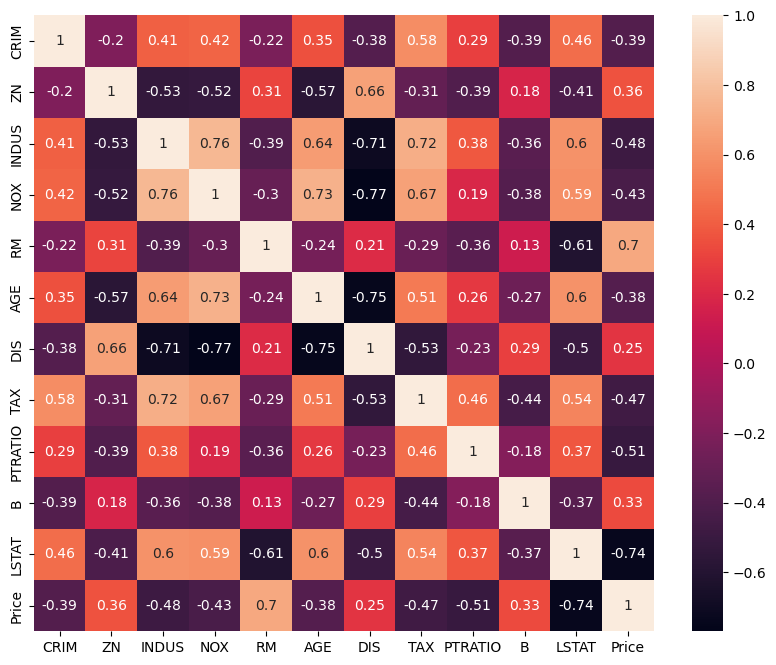

In [40]:
# 상관계수

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(boston_pd.corr(), annot=True)

'RM','LSTAT' 컬럼이 'Price' 컬럼과 높은 상관계수가 있다.

'RM','LSTAT' 와 'Price'와의 관계를 좀 더 살펴보자.

<Axes: xlabel='LSTAT', ylabel='Price'>

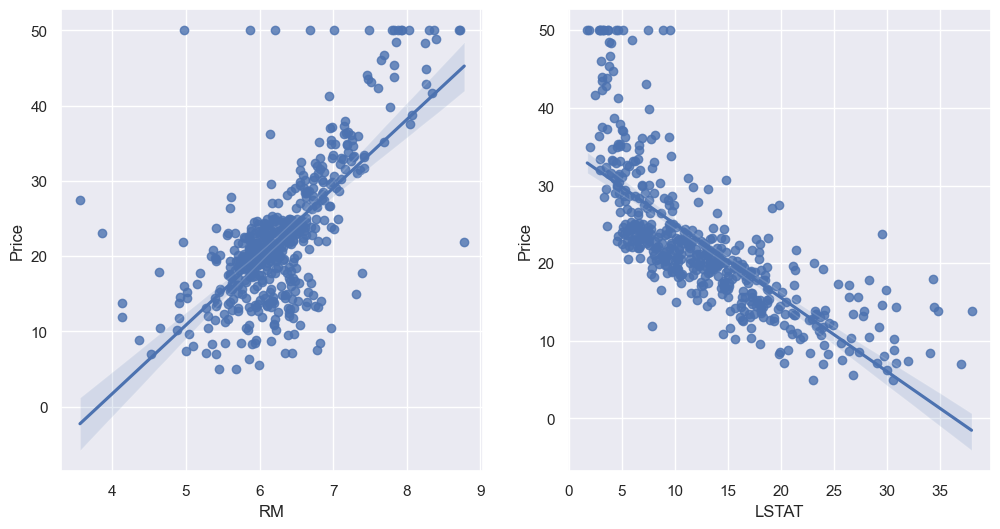

In [41]:
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize' : (12, 6)})

fig, ax = plt.subplots(ncols = 2)
sns.regplot(x = "RM", y = "Price", data = boston_pd, ax = ax[0])
sns.regplot(x = "LSTAT", y = "Price", data = boston_pd, ax = ax[1])

대체적으로 'RM'이 커질 수록 'Price'가 오르고 'LSTAT'가 작을수록 'Price'가 크긴한데 특이한 데이터가 몇 개 보이기도 한다.

'LSTAT' 컬럼은 저소득층의 비율이다. 

생각해보자. 저소득층들은 집 값이 적은 곳에서 거주를 할텐데, 어찌보면 'LSTAT'을 함께 넣어 분석하는 것은 너무 뻔한 이야기가 아닐까?

물론 Boston 데이터에서 해당 컬럼을 빼고, 넣는거에 성능이 크게 달라지진 않지만 앞으로 우리가 분석할 데이터에 이런 상황을 마주하게 된다면 고민이 좀 더 필요할 것이다.

모델링

In [45]:
boston_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [47]:
# 모델에 넣으려면 숫자형이여야하므로 'CHAS', 'RAD' 데이터유형 변경

boston_pd['CHAS'] = boston_pd['CHAS'].astype('float')
boston_pd['RAD'] = boston_pd['RAD'].astype('float')

boston_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [50]:
from sklearn.model_selection import train_test_split

X = boston_pd.drop('Price', axis = 1)
y = boston_pd['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

In [51]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [52]:
import numpy as np
from sklearn.metrics import mean_squared_error
# regression은 분류문제와 같이 accuracy 같은 것이 없기 때문에
# regression에 맞는 모델 성능 지표를 써야한다.
# 대표적인 것이 mse이다


pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

RMSE of Train Data :  4.666028280027507
RMSE of Test Data :  4.7309673743475


회귀에서 모델 성능을 평가하는 방법은 여러가지가 있지만 그 중에 하나는 바로 실제값과 예측값을 scatter plot으로 그리는 것이다.

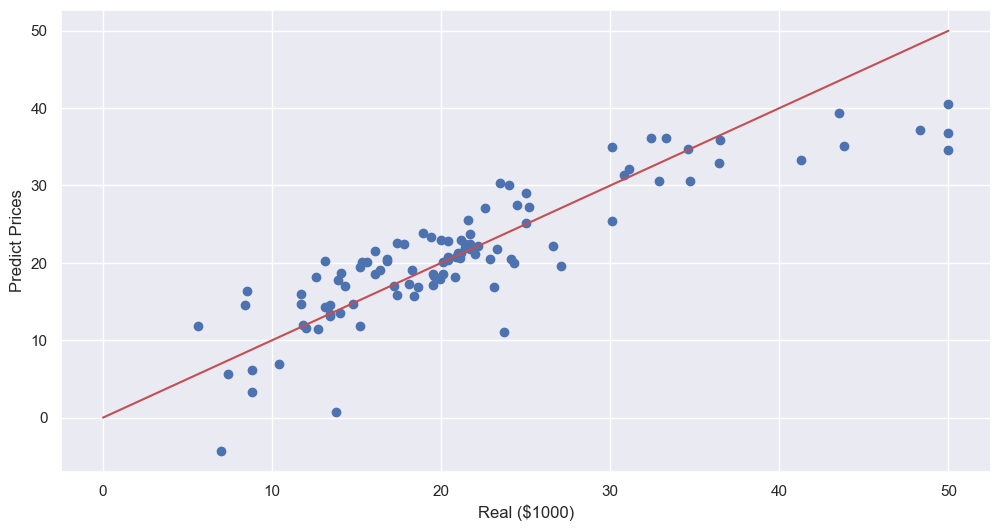

In [53]:
plt.scatter(y_test, pred_test)
plt.xlabel('Real ($1000)')
plt.ylabel('Predict Prices')
plt.plot([0,50],[0,50], 'r')
plt.show()

오른쪽 상단 부분이 사알짝 안 맞는 것으로 보인다.

번외로, 아까 이야기했던 'LSTAT' 컬럼은 사용하는 것이 맞을까?

In [54]:
X = boston_pd.drop(['Price', 'LSTAT'], axis = 1)
y = boston_pd["Price"]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

# 모델링
reg = LinearRegression()
reg.fit(X, y)

# 성능평가
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

RMSE of Train Data :  5.192846303982495
RMSE of Test Data :  5.04441018688667


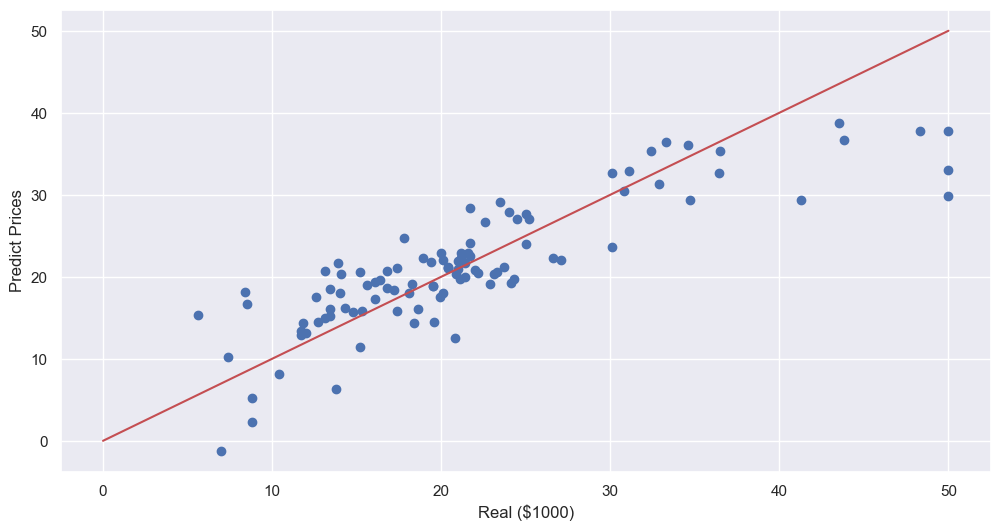

In [55]:
plt.scatter(y_test, pred_test)
plt.xlabel('Real ($1000)')
plt.ylabel('Predict Prices')
plt.plot([0,50],[0,50], 'r')
plt.show()

RMSE 가 높아진 것으로 보아 성능은 나빠졌지만 '해당 컬럼을 빼야한다' 는 선택을 할 근거는 되지 못한다. 

이런 문제가 생겼다면 여러 검증을 통해 필드를 선택하는 능력도 키워야할 것이다.